In [1]:
%load_ext autoreload
%autoreload 2

# add modules from parent package
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Data

brazilian dataset https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [5]:
import os

In [6]:
base_dir = '../data/brazil/'

In [19]:
orders_path = os.path.join(base_dir, 'olist_order_items_dataset.csv')
order_items = pd.read_csv(orders_path)

In [22]:
orders_path = os.path.join(base_dir, 'olist_orders_dataset.csv')
orders = pd.read_csv(orders_path)

In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items.order_id.nunique()

98666

In [23]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [26]:
order_items['product_id'] = order_items['product_id'].astype('category')

In [32]:
order_items['product_id'].nunique(), order_items.shape[0], round(100*order_items['product_id'].nunique()/ order_items.shape[0])

(32951, 112650, 29)

In [34]:
order_items['price_int'] = order_items['price'].astype(np.int32)

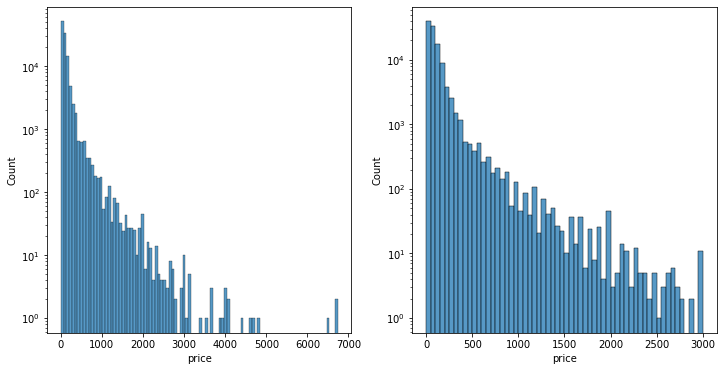

In [49]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(x='price', data=order_items, bins=100)
plt.yscale('log')
plt.subplot(1,2,2)
sns.histplot(x='price', data=order_items[order_items['price'] < 3000], bins=60)
plt.yscale('log')

In [38]:
order_items['price_int'].nunique()

1069

In [57]:
product_prices = order_items.groupby(['product_id']).price_int.nunique().sort_values(ascending=False)

In [ ]:
product_prices[:50]

product_id
e0d64dcfaa3b6db5c54ca298ae101d05    26
d285360f29ac7fd97640bf0baef03de0    24
69455f41626a745aea9ee9164cb9eafd    21
6f3b5b605d91b7439c5e3f5a8dffeea7    21
53b36df67ebb7c41585e8d54d6772e08    20
461f43be3bdf8844e65b62d9ac2c7a5a    18
f819f0c84a64f02d3a5606ca95edd272    17
656e0eca68dcecf6a31b8ececfabe3e8    16
e53e557d5a159f5aa2c5e995dfdf244b    15
4298b7e67dc399c200662b569563a2b2    15
53ea9da485f6aed8a6f03a85831fe021    14
0a57f7d2c983bcf8188589a5fea4a8da    14
d5991653e037ccb7af6ed7d94246b249    13
4aa6014eceb682077f9dc4bffebc05b0    12
7a10781637204d8d10485c71a6108a2e    12
db5efde3ad0cc579b130d71c4b2db522    11
f1c7f353075ce59d8a6f3cf58f419c9c    11
3225c54bb2785c33f49f50398fcdb88c    11
2ffdf10e724b958c0f7ea69e97d32f64    11
73bcea88583002fe12b7399af4ae60da    11
437c05a395e9e47f9762e677a7068ce7    11
8317b177579dd27ff068b83205e2169b    11
bce474cc95b6e77657e10939b0b4248c    10
4fe644d766c7566dbc46fb851363cb3b    10
d04e48982547095af81c231c3d581cb6    10
41c24b8ce92d1a

In [63]:
pid = 'e0d64dcfaa3b6db5c54ca298ae101d05'

In [66]:
df = order_items[order_items.product_id == pid]

In [68]:
df.shape

(194, 8)

In [67]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_int
276,00b2d2f2b5f7b98e6b1828764660134e,1,e0d64dcfaa3b6db5c54ca298ae101d05,7d13fca15225358621be4086e1eb0964,2018-08-20 08:50:19,146.01,13.68,146
1555,03953c6f8f398530d8847bf6000ffa78,1,e0d64dcfaa3b6db5c54ca298ae101d05,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-23 00:31:14,127.00,17.80,127
1630,03be2f620301ed720f761e04f00270d4,1,e0d64dcfaa3b6db5c54ca298ae101d05,7d13fca15225358621be4086e1eb0964,2018-06-15 12:35:12,144.00,14.37,144
1911,045797b656bf633566b0bcff412442a3,1,e0d64dcfaa3b6db5c54ca298ae101d05,4869f7a5dfa277a7dca6462dcf3b52b2,2017-12-07 11:30:59,170.00,21.68,170
2257,0527142b56f235b4936a8573f33b020b,1,e0d64dcfaa3b6db5c54ca298ae101d05,4869f7a5dfa277a7dca6462dcf3b52b2,2017-07-25 03:50:23,189.99,16.08,189


small number of sells

<AxesSubplot:>

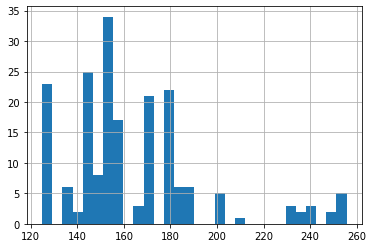

In [71]:
df.price.hist(bins=30)

In [73]:
df['price'].value_counts()

151.90    30
179.90    22
170.00    21
124.90    18
158.00    14
144.00    14
146.01     6
134.90     6
185.00     6
255.61     5
145.00     5
199.00     5
189.99     5
149.90     4
155.00     4
148.99     4
231.27     3
127.00     3
239.99     3
155.55     3
165.00     3
142.00     2
128.90     2
249.80     2
235.99     2
209.99     1
187.00     1
Name: price, dtype: int64

seems ok

maybe can try to find products by gmv

need to estimate conversion

-> find number of customers at each day

In [79]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [85]:
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64[ns]')
orders['date'] = orders['order_purchase_timestamp'].dt.date.astype('datetime64[ns]')

In [100]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   date                           99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 6.8+ MB


<AxesSubplot:xlabel='date', ylabel='count'>

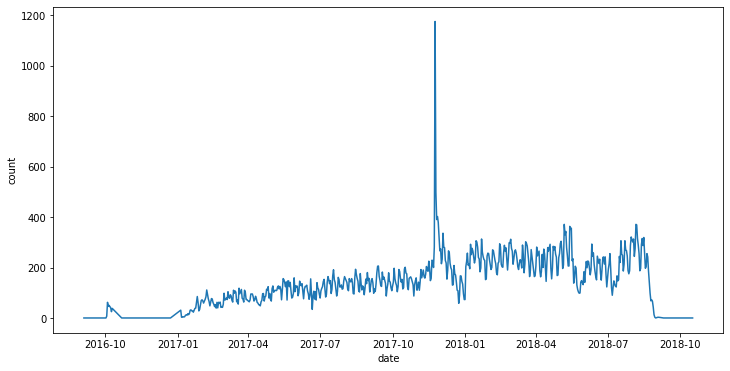

In [110]:
fig, axs = plt.subplots(figsize=(12, 6))
date_to_num_orders = orders.groupby('date').size().reset_index().rename(columns={0: 'count'})
sns.lineplot(x='date', y='count', data=date_to_num_orders)

conclusion -> take data from  2017.02 to 2018.09

In [121]:
mask = (
    (orders['date'] >= '2017-03-01') &
    (orders['date'] < '2017-09-01')
)
orders = orders[mask]

<AxesSubplot:xlabel='date', ylabel='count'>

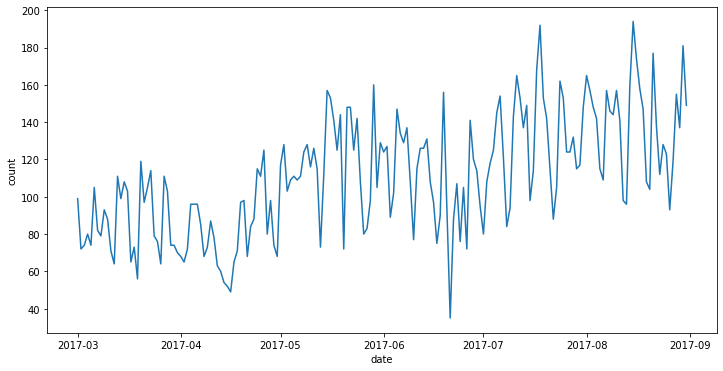

In [122]:
fig, axs = plt.subplots(figsize=(12, 6))
date_to_num_orders = orders.groupby('date').size().reset_index().rename(columns={0: 'count'})
sns.lineplot(x='date', y='count', data=date_to_num_orders)

definitely seasonal

In [125]:
date_to_num_orders['wd'] = date_to_num_orders.date.dt.weekday

In [127]:
date_to_num_orders

,date,count,wd
0,2017-03-01,99,2
1,2017-03-02,72,3
2,2017-03-03,74,4
3,2017-03-04,80,5
4,2017-03-05,74,6
...,...,...,...
179,2017-08-27,119,6
180,2017-08-28,155,0
181,2017-08-29,137,1
182,2017-08-30,181,2


find product sales

In [144]:
product_revenue = order_items.groupby('product_id').price.sum().sort_values(ascending=False).reset_index()
product_prices = order_items.groupby(['product_id']).price_int.nunique().sort_values(ascending=False)
product_revenue = product_revenue.rename(columns={'price': 'revenue'})
products = product_revenue.merge(product_prices, on='product_id')

In [149]:
products['revenue_pct_cum'] = products['revenue'].cumsum() / products['revenue'].sum()

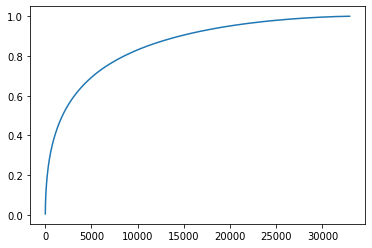

In [153]:
plt.plot(products['revenue_pct_cum']);

filter non popular products

In [155]:
revenue_pct_threshold = 0.6

In [156]:
products = products[products['revenue_pct_cum'] < revenue_pct_threshold]

In [161]:
products = products.sort_values('price_int', ascending=False)

In [164]:
products[:10]

,product_id,revenue,price_int,revenue_pct_cum
10,e0d64dcfaa3b6db5c54ca298ae101d05,31786.82,26,0.035504
11,d285360f29ac7fd97640bf0baef03de0,31623.81,24,0.037831
191,69455f41626a745aea9ee9164cb9eafd,6652.48,21,0.188204
30,6f3b5b605d91b7439c5e3f5a8dffeea7,19009.40,21,0.070835
8,53b36df67ebb7c41585e8d54d6772e08,37683.42,20,0.030398
26,461f43be3bdf8844e65b62d9ac2c7a5a,20593.22,18,0.064959
14,f819f0c84a64f02d3a5606ca95edd272,29024.48,17,0.044415
65,656e0eca68dcecf6a31b8ececfabe3e8,12477.60,16,0.107998
64,4298b7e67dc399c200662b569563a2b2,12479.70,15,0.107080
37,e53e557d5a159f5aa2c5e995dfdf244b,15439.25,15,0.079601


first 10 products will probably be enough

- all of them are top products by revenue
- they have a high number of different prices

In [191]:
top_product_ids = products[:9].product_id.to_list()

In [192]:
pid = top_product_ids[1]

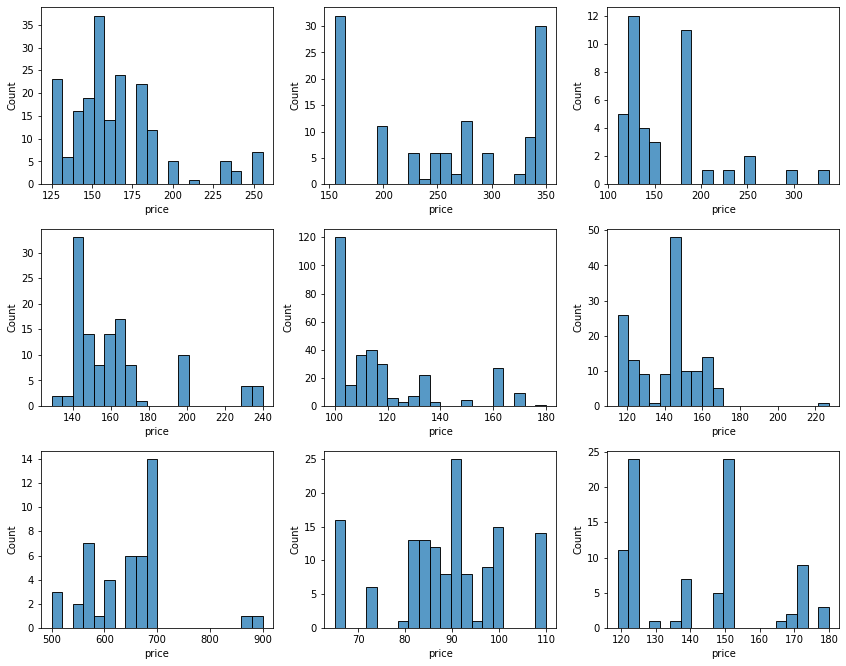

In [197]:
fig,axs = plt.subplots(figsize=(12, 12))

for i, pid in enumerate(top_product_ids):
    ax = plt.subplot(4, 3, i+1)
    df = order_items[order_items.product_id == pid]
    sns.histplot(x='price', data=df, bins=20,ax=ax)
    # plt.title(pid);
    
fig.tight_layout()

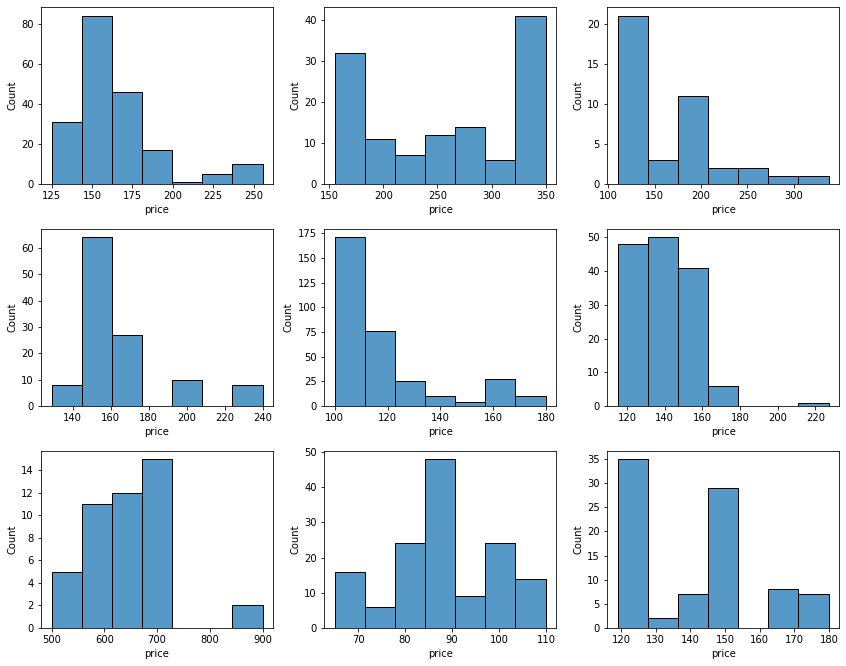

In [198]:
fig,axs = plt.subplots(figsize=(12, 12))

for i, pid in enumerate(top_product_ids):
    ax = plt.subplot(4, 3, i+1)
    df = order_items[order_items.product_id == pid]
    sns.histplot(x='price', data=df, bins=7,ax=ax)
    # plt.title(pid);
    
fig.tight_layout()

In [209]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64[ns]')
order_items['date'] = order_items['shipping_limit_date'].dt.date.astype('datetime64[ns]')

In [223]:
order_items['date'].value_counts()

2017-11-30    1647
2017-12-07     752
2018-04-19     709
2018-05-10     673
2018-01-18     661
              ... 
2018-09-13       1
2016-10-31       1
2020-02-05       1
2018-09-18       1
2018-09-02       1
Name: date, Length: 555, dtype: int64

In [228]:
product_counts = order_items[order_items.product_id.isin(top_product_ids)].groupby('product_id').size()
product_counts = product_counts[product_counts!=0]

In [229]:
product_counts

product_id
4298b7e67dc399c200662b569563a2b2     88
461f43be3bdf8844e65b62d9ac2c7a5a    146
53b36df67ebb7c41585e8d54d6772e08    323
656e0eca68dcecf6a31b8ececfabe3e8    141
69455f41626a745aea9ee9164cb9eafd     41
6f3b5b605d91b7439c5e3f5a8dffeea7    117
d285360f29ac7fd97640bf0baef03de0    123
e0d64dcfaa3b6db5c54ca298ae101d05    194
f819f0c84a64f02d3a5606ca95edd272     45
dtype: int64

each product has around 150/500 days of sales :(

might be problematic for conversion rate

the problem:
- products have intermittent demand

### conclusion

- some products have a big number of price changes
- the conversion rates are going to be quite low since products have intermittent demand